# Importing Libraries




In [37]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
import plotly.express as px

# load dataset

In [38]:
df = pd.read_csv('covid19_deaths.csv')
df


,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.000000,0.131687,0.013758
1,Australia,Australia,0,2020-01-08,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.000000,0.200985,0.021040
2,Australia,Australia,0,2020-01-15,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.000000,0.250854,0.026496
3,Australia,Australia,0,2020-01-22,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.000000,0.623252,0.065824
4,Australia,Australia,0,2020-01-29,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.000000,0.326629,0.034648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11710,United States,United States,USA,2021-03-14,2021,11,317812460,58076,7022.0,58898.357320,-822.357322,51054.0,2.209479,-0.258756,-0.013962
11711,United States,United States,USA,2021-03-21,2021,12,317812460,57996,6938.0,58534.957320,-538.957322,51058.0,2.183048,-0.169583,-0.009207
11712,United States,United States,USA,2021-03-28,2021,13,316020313,55007,9514.0,57810.357320,-2803.357322,45493.0,3.010566,-0.887081,-0.048492
11713,United States,United States,USA,2021-04-04,2021,14,316020313,55265,6684.0,57736.557320,-2471.557322,48581.0,2.115054,-0.782088,-0.042807


# Overview of the Dataset

In [39]:
df.info()
# summary the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   11715 non-null  object 
 1   region                    11715 non-null  object 
 2   region_code               11715 non-null  object 
 3   start_date                11715 non-null  object 
 4   year                      11715 non-null  int64  
 5   week                      11715 non-null  int64  
 6   population                11715 non-null  int64  
 7   total_deaths              11715 non-null  int64  
 8   covid_deaths              11715 non-null  float64
 9   expected_deaths           11715 non-null  float64
 10  excess_deaths             11715 non-null  float64
 11  non_covid_deaths          11715 non-null  float64
 12  covid_deaths_per_100k     11715 non-null  float64
 13  excess_deaths_per_100k    11715 non-null  float64
 14  excess

In [4]:
df.shape
# shape of dataset (columns , rows)

(11715, 15)

In [95]:
df.columns
# #checking columns names

Index(['country', 'region', 'region_code', 'start_date', 'year', 'week',
       'population', 'total_deaths', 'covid_deaths', 'expected_deaths',
       'excess_deaths', 'non_covid_deaths', 'covid_deaths_per_100k',
       'excess_deaths_per_100k', 'excess_deaths_pct_change'],
      dtype='object')

In [96]:
df.describe()
#to view some basic statistical details like percentile, mean, std  ...

,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,11715.000000,11715.000000,1.171500e+04,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000
mean,2020.203927,23.115322,1.115783e+07,2160.281861,249.987751,1872.656236,287.625625,1910.294110,214.453596,229.005895,0.141454
std,0.402932,15.789753,2.921175e+07,5860.294477,998.592679,4985.142151,1350.148074,5099.567164,334.141587,467.970160,0.298217
min,2020.000000,1.000000,8.466700e+04,3.000000,-270.000000,2.000000,-6361.757322,-1723.000000,-880.332268,-1601.989112,-0.823949
25%,2020.000000,9.000000,1.359711e+06,279.000000,1.000000,257.175625,-5.531544,253.000000,4.747375,-25.787406,-0.015423
50%,2020.000000,20.000000,4.648794e+06,883.000000,24.000000,814.000000,27.073081,805.000000,89.992848,114.149990,0.069270
75%,2020.000000,37.000000,8.570146e+06,1624.000000,141.000000,1410.509584,147.225093,1421.500000,292.692587,337.299038,0.204734
max,2021.000000,53.000000,3.283005e+08,86388.000000,23481.000000,63308.370990,27036.540030,70504.000000,6328.324174,8086.310844,6.350086


In [97]:
df.head(5)
# returns the first 5 rows 

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.0,13.168653,0.013758
1,Australia,Australia,0,2020-01-08,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.0,20.098498,0.021040
2,Australia,Australia,0,2020-01-15,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.0,25.085396,0.026496
3,Australia,Australia,0,2020-01-22,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.0,62.325219,0.065824
4,Australia,Australia,0,2020-01-29,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.0,32.662891,0.034648


In [98]:
df.tail(5)
# returns the last 5 rows 

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
11710,United States,United States,USA,2021-03-14,2021,11,317812460,58076,7022.0,58898.35732,-822.357322,51054.0,220.947914,-25.875553,-0.013962
11711,United States,United States,USA,2021-03-21,2021,12,317812460,57996,6938.0,58534.95732,-538.957322,51058.0,218.304846,-16.958345,-0.009207
11712,United States,United States,USA,2021-03-28,2021,13,316020313,55007,9514.0,57810.35732,-2803.357322,45493.0,301.056597,-88.708137,-0.048492
11713,United States,United States,USA,2021-04-04,2021,14,316020313,55265,6684.0,57736.55732,-2471.557322,48581.0,211.505391,-78.208812,-0.042807
11714,United States,United States,USA,2021-04-11,2021,15,316020313,50995,4966.0,57356.75732,-6361.757322,46029.0,157.141797,-201.308494,-0.110916


In [99]:
df.corr()
#  to find the pairwise correlation of all columns in the dataframe

,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
year,1.000000,-0.485416,-0.000653,0.016482,0.105461,0.014651,0.017442,-0.001711,0.234663,-0.005735,-0.003078
week,-0.485416,1.000000,0.000192,-0.001559,0.004453,-0.018615,0.061968,-0.002663,0.060095,0.191882,0.162113
population,-0.000653,0.000192,1.000000,0.975097,0.704549,0.982225,0.605729,0.982593,0.010967,0.023487,0.037762
total_deaths,0.016482,-0.001559,0.975097,1.000000,0.797555,0.981909,0.714985,0.992998,0.077984,0.098013,0.099333
covid_deaths,0.105461,0.004453,0.704549,0.797555,1.000000,0.709322,0.842746,0.720711,0.304489,0.260263,0.257507
expected_deaths,0.014651,-0.018615,0.982225,0.981909,0.709322,1.000000,0.569668,0.989487,0.021321,0.018451,0.015291
excess_deaths,0.017442,0.061968,0.605729,0.714985,0.842746,0.569668,1.000000,0.656618,0.259764,0.357294,0.374695
non_covid_deaths,-0.001711,-0.002663,0.982593,0.992998,0.720711,0.989487,0.656618,1.000000,0.029993,0.061669,0.063726
covid_deaths_per_100k,0.234663,0.060095,0.010967,0.077984,0.304489,0.021321,0.259764,0.029993,1.000000,0.785213,0.703755
excess_deaths_per_100k,-0.005735,0.191882,0.023487,0.098013,0.260263,0.018451,0.357294,0.061669,0.785213,1.000000,0.932697


In [100]:
df.sample(5)
#returns the random 5 rows 

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
8456,United States,California,CA,2021-02-21,2021,8,39512223,6632,2996.0,5715.857183,916.142817,3636.0,758.246379,231.863142,0.160281
9356,United States,Louisiana,LA,2020-02-23,2020,9,4648794,993,0.0,930.099721,62.900279,993.0,0.000000,135.304509,0.067627
2011,Chile,General Carlos Ibáñez del Campo's Aysén,CL-AI,2021-01-01,2021,1,103158,15,0.0,9.441336,5.558664,15.0,0.000000,538.849521,0.588758
7904,Switzerland,Switzerland,0,2020-03-23,2020,13,8570146,1630,202.0,1284.462921,345.537079,1428.0,235.701935,403.186922,0.269013
2014,Chile,General Carlos Ibáñez del Campo's Aysén,CL-AI,2021-01-22,2021,4,103158,13,0.0,11.608003,1.391997,13.0,0.000000,134.938368,0.119917


# Data cleaning and preprocessing

In [101]:
df.isna().sum()
#checking the null values

country                     0
region                      0
region_code                 0
start_date                  0
year                        0
week                        0
population                  0
total_deaths                0
covid_deaths                0
expected_deaths             0
excess_deaths               0
non_covid_deaths            0
covid_deaths_per_100k       0
excess_deaths_per_100k      0
excess_deaths_pct_change    0
dtype: int64

In [102]:
df.drop_duplicates
# checking dublicates and drop

<bound method DataFrame.drop_duplicates of              country         region region_code  start_date  year  week  \
0          Australia      Australia           0  2020-01-01  2020     1   
1          Australia      Australia           0  2020-01-08  2020     2   
2          Australia      Australia           0  2020-01-15  2020     3   
3          Australia      Australia           0  2020-01-22  2020     4   
4          Australia      Australia           0  2020-01-29  2020     5   
...              ...            ...         ...         ...   ...   ...   
11710  United States  United States         USA  2021-03-14  2021    11   
11711  United States  United States         USA  2021-03-21  2021    12   
11712  United States  United States         USA  2021-03-28  2021    13   
11713  United States  United States         USA  2021-04-04  2021    14   
11714  United States  United States         USA  2021-04-11  2021    15   

       population  total_deaths  covid_deaths  expected_

In [103]:
df.value_counts()
# to counts of unique values

country        region     region_code  start_date  year  week  population  total_deaths  covid_deaths  expected_deaths  excess_deaths  non_covid_deaths  covid_deaths_per_100k  excess_deaths_per_100k  excess_deaths_pct_change
Australia      Australia  0            2020-01-01  2020  1     25734100    2497          0.0           2463.111657       33.888343     2497.0            0.000000                13.168653               0.013758                   1
Spain          Valencia   10           2020-12-16  2020  51    4948411     1020          131.0         923.250000        96.750000     889.0             264.731446              195.517308              0.104793                   1
                                       2020-12-30  2020  53    4948411     331           80.0          281.750000        49.250000     251.0             161.668059              99.526899               0.174800                   1
                                       2021-01-01  2021  1     4948411     1273      

In [104]:
df.country.value_counts()
# to counts of unique country

United States     3591
Spain             1420
Italy             1160
Chile             1056
Britain            980
France             966
Netherlands         70
Estonia             70
Peru                70
South Africa        70
Denmark             70
Bulgaria            69
Norway              69
Lithuania           69
Belgium             69
Austria             69
Switzerland         69
Germany             69
New Zealand         68
Sweden              68
Slovenia            68
Portugal            68
Latvia              68
Finland             67
Colombia            67
Poland              67
Hungary             67
Greece              66
Luxembourg          66
Mexico              65
Cyprus              65
Croatia             65
Czech Republic      65
Slovakia            65
Iceland             64
Malta               64
Israel              63
South Korea         62
Romania             60
Tunisia             58
Montenegro          57
Australia           57
Canada              54
Turkey     

In [105]:
df.region.unique()
# to find unique of region

array(['Australia', 'Austria', 'Belgium', 'England and Wales',
       'North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'East', 'London', 'South East',
       'South West', 'Wales', 'Scotland', 'Northern Ireland', 'Britain',
       'Bulgaria', 'Canada', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Libertador General Bernardo OHiggins',
       'Maule', 'Biobio', 'Araucanía', 'Los Lagos',
       "General Carlos Ibáñez del Campo's Aysén",
       'Magellan and Chilean Antarctica', 'Santiago Metropolitan',
       'Los Ríos', 'Arica y Parinacota', 'Chile', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Brittany',
       'Centre-Val de Loire', 'Corsica', 'Grand Est', 'Hauts-de-France',
       'Île-de-France (Paris)', 'Normandy', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",

In [106]:
df.country.unique()
# to find unique of country

array(['Australia', 'Austria', 'Belgium', 'Britain', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Israel', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Tunisia', 'Turkey',
       'United States'], dtype=object)

In [107]:
df['population']=df.population.astype('int')
df['population']

#convert number of population from string to int to make it esay for any one read the column

0         25734100
1         25734100
2         25734100
3         25734100
4         25734100
           ...    
11710    317812460
11711    317812460
11712    316020313
11713    316020313
11714    316020313
Name: population, Length: 11715, dtype: int32

In [108]:
pop = df.population.replace(',', '')
pop
#remove space

0         25734100
1         25734100
2         25734100
3         25734100
4         25734100
           ...    
11710    317812460
11711    317812460
11712    316020313
11713    316020313
11714    316020313
Name: population, Length: 11715, dtype: int32

In [109]:
s = df.expected_deaths.replace(',', '')
s

0         2463.111657
1         2458.278324
2         2436.444991
3         2436.611657
4         2425.944991
             ...     
11710    58898.357320
11711    58534.957320
11712    57810.357320
11713    57736.557320
11714    57356.757320
Name: expected_deaths, Length: 11715, dtype: float64

In [110]:
country =df.country.str.strip()
country
#remove whitespace


0            Australia
1            Australia
2            Australia
3            Australia
4            Australia
             ...      
11710    United States
11711    United States
11712    United States
11713    United States
11714    United States
Name: country, Length: 11715, dtype: object

In [111]:
region =df.region.str.strip()
region
#remove whitespace


0            Australia
1            Australia
2            Australia
3            Australia
4            Australia
             ...      
11710    United States
11711    United States
11712    United States
11713    United States
11714    United States
Name: region, Length: 11715, dtype: object

In [112]:

df['excess_deaths_per_100k'] = df['excess_deaths_per_100k'].apply(lambda x: x*100)
df['covid_deaths_per_100k'] = df['covid_deaths_per_100k'].apply(lambda x: x*100)
# convert into %
df.head(3)

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.0,1316.86528,0.013758
1,Australia,Australia,0,2020-01-08,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.0,2009.84981,0.021040
2,Australia,Australia,0,2020-01-15,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.0,2508.53962,0.026496


# Analysis deaths for 2020

In [113]:
df[df.year==2020].covid_deaths.sum()

#total covide deaths in 2020

1834317.5

In [114]:
df[df.year==2020].covid_deaths.sum()/365
# #total covide deaths in 2020 per day

5025.527397260274

In [115]:
df[df.year==2020].non_covid_deaths.sum()
#total on_covid_deaths in 2020

17856580.5

In [116]:
df[df.year==2020].non_covid_deaths.sum()/365
# #total non_covid_deaths in 2020 per day

48922.13835616438

# Analysis deaths for 2021

In [117]:
df[df.year==2021].covid_deaths.sum()

#total covide deaths in 2021


1094289.0

In [118]:
df[df.year==2021].covid_deaths.sum()/365
# #total covide deaths in 2021 per day

2998.0520547945207

In [119]:
df[df.year==2021].non_covid_deaths.sum()
#total on_covid_deaths in 2021

4522515.0

In [120]:
df[df.year==2021].non_covid_deaths.sum()/365
# #total non_covid_deaths in 2021 per day

12390.452054794521

In [121]:
(df[df.year==2021].covid_deaths.sum() + df[df.year==2020].covid_deaths.sum()) / 730
##total covide deaths in 2020-2021 per day

4011.789726027397

In [122]:
df.groupby('year').total_deaths.sum()
#the total deaths in 2020-2021

year
2020    19690898
2021     5616804
Name: total_deaths, dtype: int64

In [123]:
df.groupby('country').expected_deaths.sum()


country
Australia         1.496655e+05
Austria           1.109644e+05
Belgium           1.474055e+05
Britain           2.392837e+06
Bulgaria          1.447352e+05
Canada            3.021065e+05
Chile             2.752850e+05
Colombia          3.219970e+05
Croatia           6.512707e+04
Cyprus            8.065238e+03
Czech Republic    1.435666e+05
Denmark           7.478760e+04
Estonia           2.121658e+04
Finland           7.099471e+04
France            1.597086e+06
Germany           1.287694e+06
Greece            1.628057e+05
Hungary           1.693805e+05
Iceland           2.873245e+03
Israel            5.675108e+04
Italy             1.385186e+06
Latvia            3.699225e+04
Lithuania         5.018531e+04
Luxembourg        5.687613e+03
Malta             4.838374e+03
Mexico            9.539070e+05
Montenegro        7.221762e+03
Netherlands       2.104309e+05
New Zealand       4.471229e+04
Norway            5.457257e+04
Peru              1.696903e+05
Poland            5.435134e+05


In [124]:
df.groupby('country').excess_deaths.sum()

country
Australia         3.637472e+03
Austria           8.972594e+03
Belgium           1.740048e+04
Britain           3.361517e+05
Bulgaria          2.873575e+04
Canada            1.388849e+04
Chile             4.485502e+04
Colombia          7.370496e+04
Croatia           6.670928e+03
Cyprus            8.576180e+01
Czech Republic    3.101442e+04
Denmark          -9.906028e+02
Estonia           1.504423e+03
Finland           4.972880e+02
France            1.494457e+05
Germany           3.986247e+04
Greece            4.534260e+03
Hungary           2.032854e+04
Iceland          -3.024476e+01
Israel            4.125920e+03
Italy             2.201383e+05
Latvia            2.129752e+03
Lithuania         9.010688e+03
Luxembourg        2.093873e+02
Malta             2.916257e+02
Mexico            4.359720e+05
Montenegro        8.722382e+02
Netherlands       1.825407e+04
New Zealand      -2.094288e+03
Norway           -1.281575e+03
Peru              1.652047e+05
Poland            9.575960e+04


In [125]:
top_total_deaths = df.groupby(by = 'country')['covid_deaths'].sum().sort_values(ascending = False).head(5).reset_index()
top_total_deaths
#find top total deaths for 2020-2021

,country,covid_deaths
0,United States,1148316.0
1,Britain,439528.0
2,Mexico,201623.0
3,France,177639.0
4,Italy,172992.0


In [126]:
lowest_total_deaths = df.groupby(by = 'country')['covid_deaths'].sum().sort_values().head(5).reset_index()
lowest_total_deaths
#Find the lowest number of total deaths of 5 in 2020-2021

,country,covid_deaths
0,Taiwan,7.0
1,New Zealand,26.0
2,Iceland,29.0
3,Cyprus,252.0
4,Malta,372.0


# Visualization

[Text(0.5, 0, 'covid deaths'), Text(0, 0.5, 'Country')]

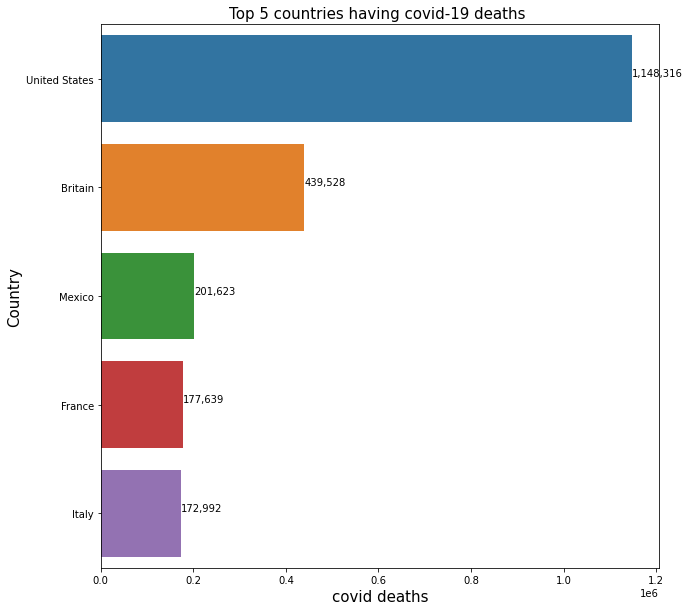

In [127]:
plt.figure(figsize= (10,10))

plt.xlabel("Total covid deaths ",fontsize = 15)
plt.ylabel('Country',fontsize = 15)
plt.title("Top 5 countries having covid-19 deaths " , fontsize = 15)
ax = sns.barplot(x = top_total_deaths.covid_deaths, y = top_total_deaths.country)
for i, (value, name) in enumerate(zip(top_total_deaths.covid_deaths, top_total_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='covid deaths', ylabel='Country')

[Text(0.5, 0, 'covid deaths'), Text(0, 0.5, 'Country')]

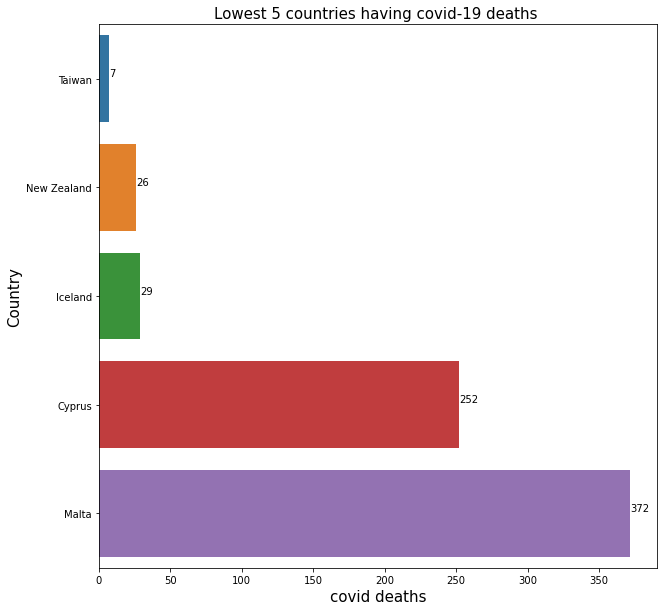

In [128]:
plt.figure(figsize= (10,10))

plt.xlabel("Total covid deaths ",fontsize = 15)
plt.ylabel('Country',fontsize = 15)
plt.title("Lowest 5 countries having covid-19 deaths " , fontsize = 15)
ax = sns.barplot(x = lowest_total_deaths.covid_deaths, y = lowest_total_deaths.country)
for i, (value, name) in enumerate(zip(lowest_total_deaths.covid_deaths, lowest_total_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='covid deaths', ylabel='Country')

Text(0, 0.5, 'Covid-19 deaths')

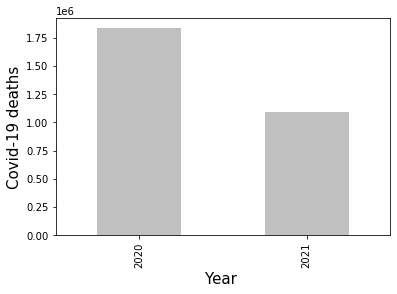

In [134]:
d=df.groupby('year').covid_deaths.sum().plot(kind='bar' , color='silver')
plt.xlabel("Year ",fontsize = 15)
plt.ylabel('Covid-19 deaths',fontsize = 15)

#In which year did covid deaths rise?


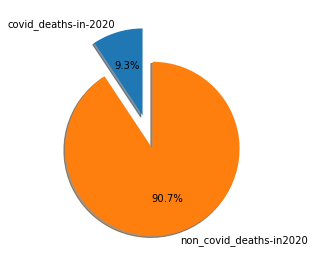

In [130]:
labels = 'covid_deaths-in-2020','non_covid_deaths-in2020'
sizes = [1834317.5 ,17856580.5
]
explode = (0, 0.4)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


plt.show()

# percentage between  covid_deaths  , non_covid_deaths in 2020

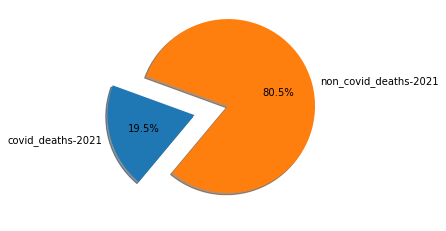

In [135]:
labels = 'covid_deaths-2021','non_covid_deaths-2021'
sizes = [1094289.0 , 4522515.0]

explode = (0, 0.4)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160)
 # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# compare between  covid_deaths , total_deaths , non_covid_deaths in 2021

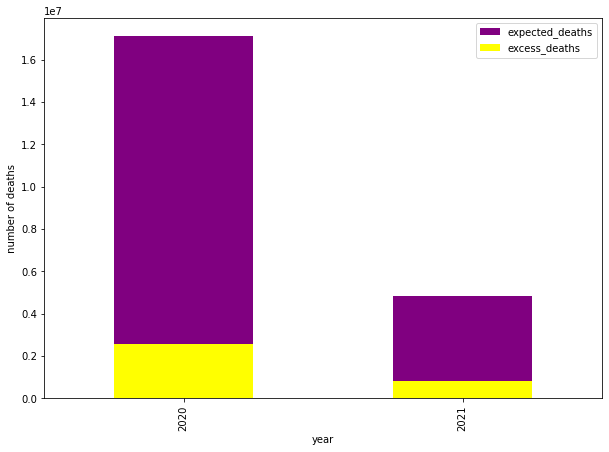

In [132]:
barWidth = 0.25
plt.figure(figsize=(10,7))
df.groupby('year').expected_deaths.sum().plot(kind='bar', color = 'Purple' )
df.groupby('year').excess_deaths.sum().plot(kind='bar',color = 'yellow' 
        )



plt.ylabel(ylabel =' number of deaths ')
plt.legend()
plt.show()



#Number of Total Deaths and Covid Deaths in World

<AxesSubplot:>

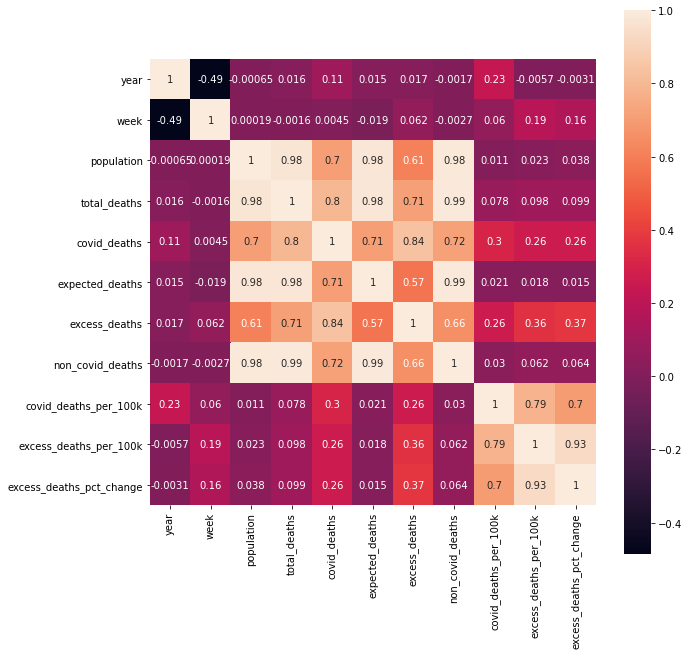

In [133]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),square=True,  annot=True)
# correlations within variables